1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

from impipy import Importance

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7, 4)  

2. Initial Data Exploration

In [2]:
df = pd.read_csv('./dataR2.csv')

In [3]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [5]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [6]:
df.shape

(116, 10)

In [7]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Classification'].value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

In [10]:
round(df['Classification'].value_counts(normalize=True)*100,2)

Classification
2    55.17
1    44.83
Name: proportion, dtype: float64

3. Data Visualization

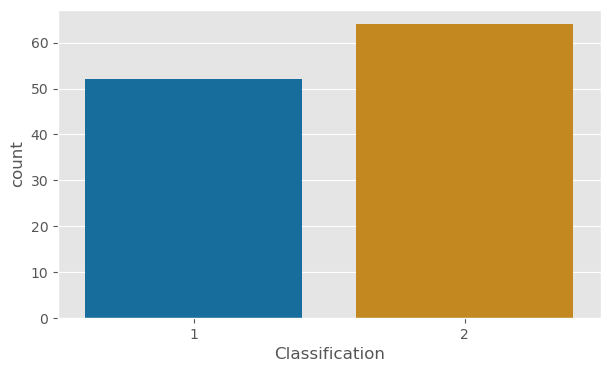

In [11]:
_ = sns.countplot(x='Classification', data=df, palette='colorblind')

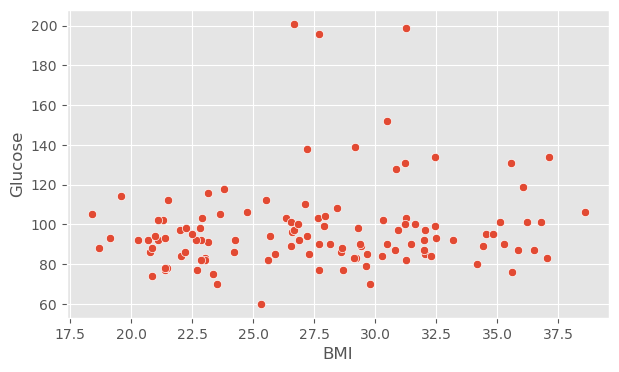

In [12]:
_ = sns.scatterplot(data=df, x='BMI', y='Glucose')

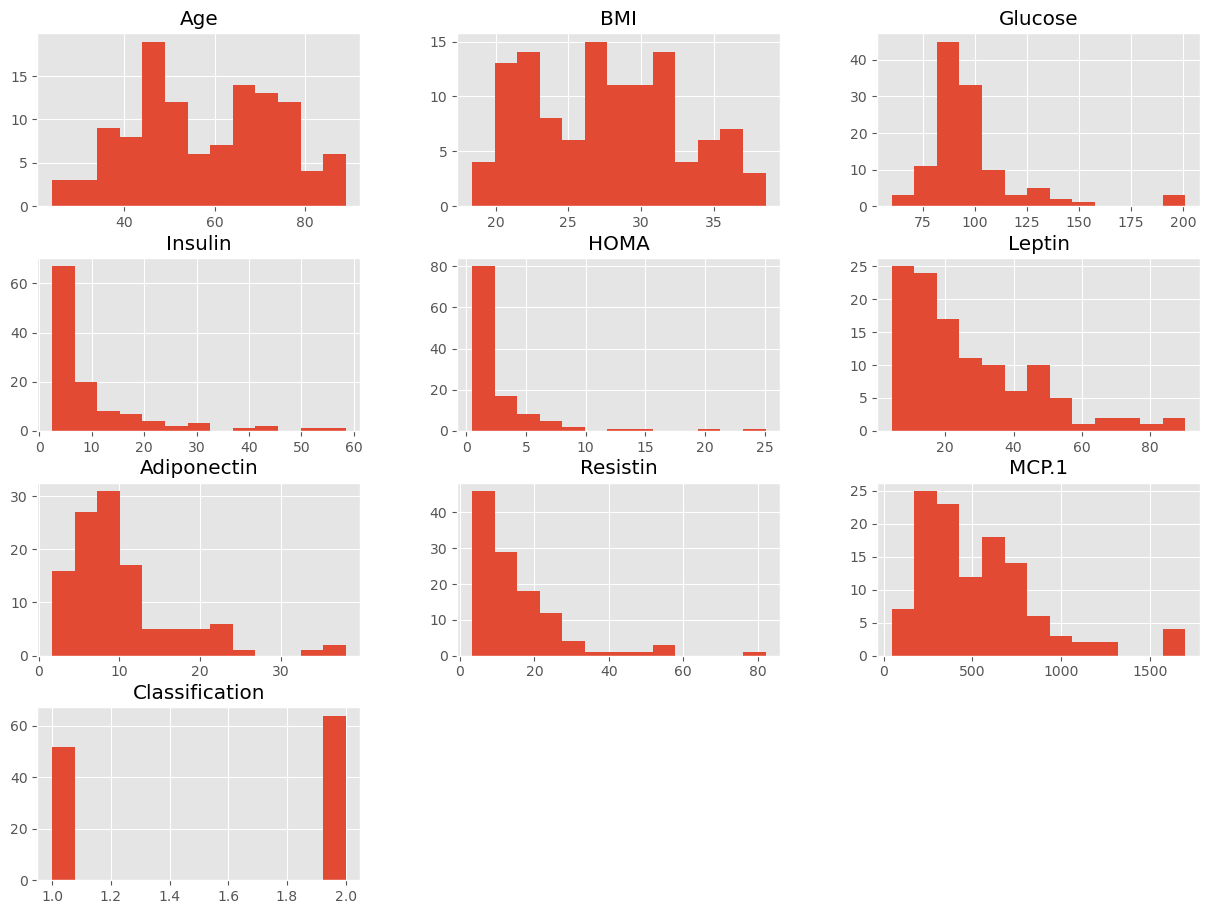

In [13]:
_ = df.hist(bins=13, figsize=(15, 11))

In [14]:
df.skew()

Age               0.017832
BMI               0.170152
Glucose           2.593305
Insulin           2.577568
HOMA              3.812087
Leptin            1.309536
Adiponectin       1.817765
Resistin          2.577429
MCP.1             1.424436
Classification   -0.210748
dtype: float64

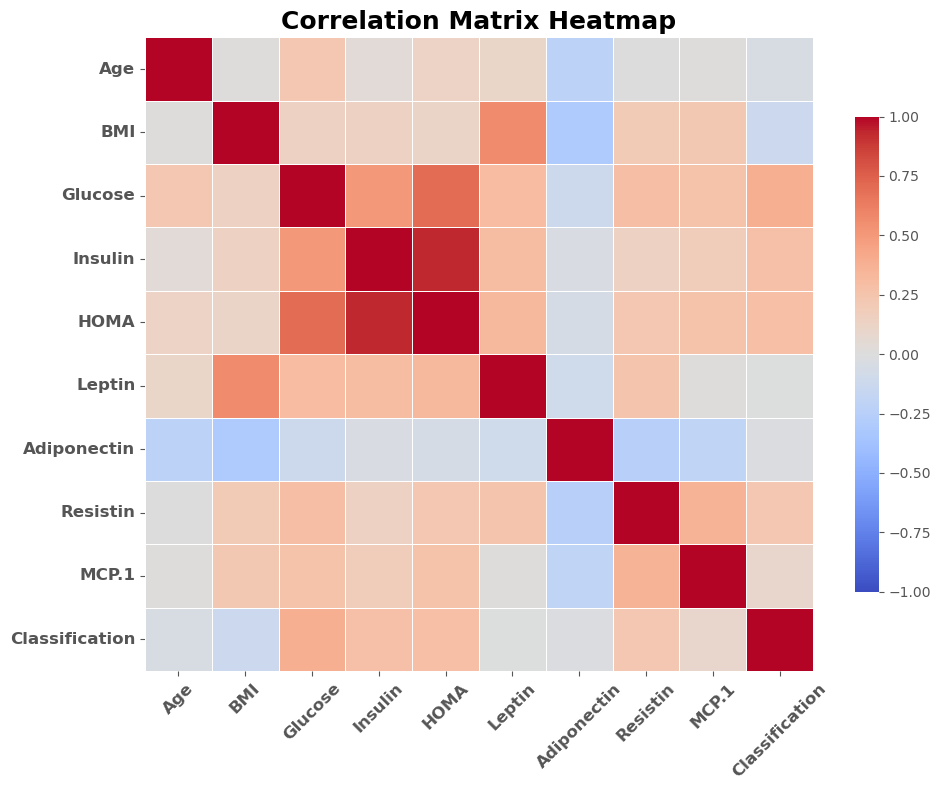

In [15]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, 
                      linewidths=0.5, cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix Heatmap', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold', rotation=0)

plt.tight_layout()

plt.show()

In [16]:
corr_matrix

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


4. Data Preparation

In [17]:
X = df.drop('Classification', axis=1)
y = df['Classification']

In [18]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [19]:
y = y - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [20]:
y_train.value_counts(normalize=True) * 100

Classification
1    55.555556
0    44.444444
Name: proportion, dtype: float64

In [21]:
y_test.value_counts(normalize=True) * 100

Classification
1    54.285714
0    45.714286
Name: proportion, dtype: float64

5. Data Standardization and Transformation

In [22]:
numerical_cols = ['Age', 'BMI']
skewed_cols = ['Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

In [23]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
49,1.717215,-0.229274,96,4.462,1.056602,7.8500,7.931700,9.61350,232.006
103,0.889651,0.250474,83,10.949,2.241625,26.8081,2.784910,14.76966,232.018
100,1.016969,0.158513,88,3.012,0.653805,31.1233,7.652220,18.35574,572.401
81,1.462580,0.724119,100,9.669,2.385020,38.8066,10.636525,29.55830,426.175
90,-1.147430,0.572072,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261


In [24]:
print('Mean:', X_train.Age.mean())
print('Std:', X_train.Age.std())

Mean: 1.2061682242841206e-16
Std: 1.0062305898749053


In [25]:
transformer = PowerTransformer()
X_train[skewed_cols] = transformer.fit_transform(X_train[skewed_cols])
X_test[skewed_cols] = transformer.transform(X_test[skewed_cols])

X_train.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
49,1.717215,-0.229274,0.084430,-0.685407,-0.634002,-1.330359,0.008717,-0.221702,-0.893693
103,0.889651,0.250474,-0.832472,0.688707,0.426164,0.405165,-2.200333,0.411018,-0.893629
100,1.016969,0.158513,-0.440828,-1.423485,-1.319673,0.605320,-0.056880,0.713500,0.347580
81,1.462580,0.724119,0.309224,0.526329,0.506026,0.895724,0.514907,1.331834,-0.087997
90,-1.147430,0.572072,1.421082,1.939661,1.957092,0.601687,-0.470180,0.652457,0.516376


In [26]:
print('Std:', X_train.Leptin.std())
print('Skew:', X_train.Leptin.skew())
print('Mean:', X_train.Leptin.mean())

Std: 1.0062305898749055
Skew: 0.029901996958450982
Mean: 6.606512319374388e-16


6. Training Classification Models

In [27]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print('SVM accuracy:', svm_score)

SVM accuracy: 0.8857142857142857


In [28]:
print('Real classes:', y_test[:10].tolist())
print('Predicted classes:', svm.predict(X_test[:10]).tolist())

Real classes: [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
Predicted classes: [0, 1, 1, 1, 0, 1, 0, 1, 1, 0]


In [29]:

dt = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print('Decision Tree accuracy:', dt_score)


knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print('K-Nearest Neighbors accuracy:', knn_score)


nb = GaussianNB()

nb.fit(X_train, y_train)
nb_score = nb.score(X_test, y_test)
print('Naive Bayes accuracy:', nb_score)


lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print('Logistic Regression accuracy:', lr_score)

Decision Tree accuracy: 0.7714285714285715
K-Nearest Neighbors accuracy: 0.7428571428571429
Naive Bayes accuracy: 0.7428571428571429
Logistic Regression accuracy: 0.7428571428571429


In [30]:

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print('Random Forest accuracy:', rf_score)

Random Forest accuracy: 0.8


In [32]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_score = xgb.score(X_test, y_test)
print('XGB accuracy:', xgb_score)

XGB accuracy: 0.8


In [33]:
voting_hard = VotingClassifier(estimators=[('svm', svm),  ('xgb', xgb), ('rf', rf)], voting='hard')

voting_hard.fit(X_train, y_train)
hard_score = voting_hard.score(X_test, y_test)
print('Hard voting classifier accuracy:', hard_score)

Hard voting classifier accuracy: 0.8857142857142857


In [34]:
voting_soft = VotingClassifier(estimators=[('svm', svm),  ('xgb', xgb), ('rf', rf)], voting='soft')

voting_soft.fit(X_train, y_train)
soft_score = voting_soft.score(X_test, y_test)
print('Soft voting classifier accuracy:', soft_score)

Soft voting classifier accuracy: 0.8


7. Model Comparison

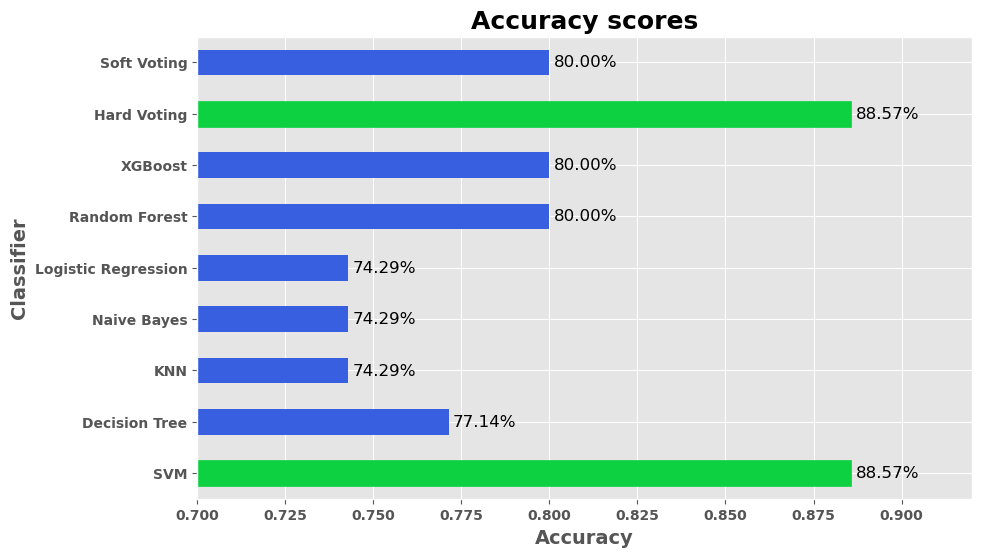

In [35]:
results = {
    'SVM': svm_score,
    'Decision Tree': dt_score,
    'KNN': knn_score,
    'Naive Bayes': nb_score,
    'Logistic Regression': lr_score,
    'Random Forest': rf_score,
    'XGBoost': xgb_score,
    'Hard Voting': hard_score,
    'Soft Voting': soft_score
}

summary = pd.Series(results)

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
bars = summary.plot.barh(color='#385fe0')
labels = [f'{val:.2%}' for val in summary.values]
bars.bar_label(bars.containers[0], labels=labels, padding=3, fontsize=12)
plt.xlim(0.7, 0.92)

# Highlighting all models with the highest score
max_score = summary.max()
max_indices = summary[summary == max_score].index
for idx in max_indices:
    bar_idx = summary.index.get_loc(idx)
    bars.patches[bar_idx].set_color('#0dd141')

plt.title('Accuracy scores', fontsize=18, fontweight='bold')
plt.xlabel('Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Classifier', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

8. Feature Importance

100%|██████████| 81/81 [00:00<00:00, 297.33it/s]


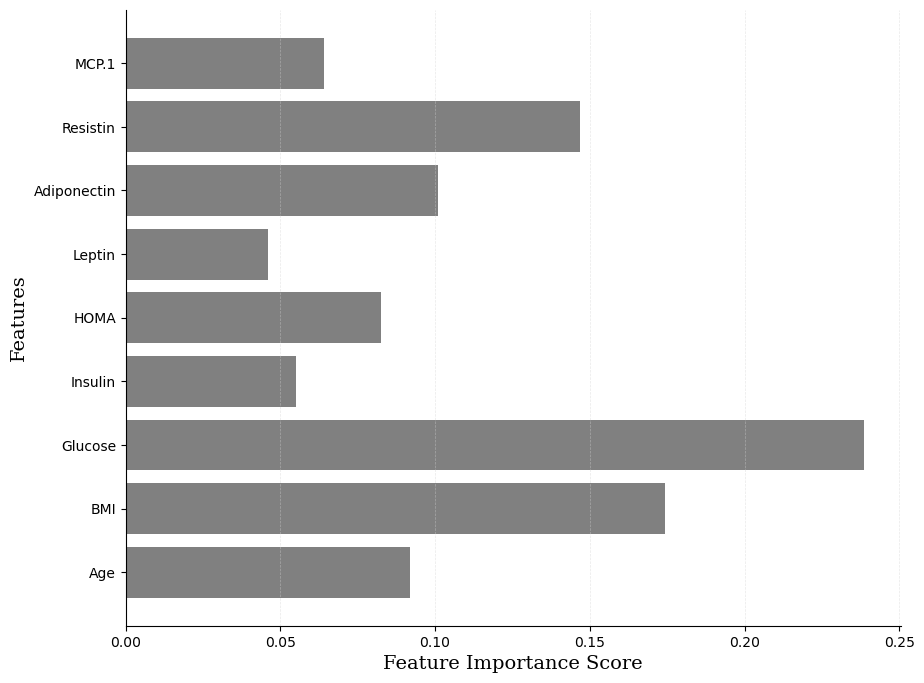

In [36]:
imp = Importance(svm, X_train, continuous_features = [0,1,2,3,4,5,6,7,8])
Result = imp.calculate_feature_importances(plot=True)

9. Error Analysis

In [37]:
y_pred_svm = svm.predict(X_test)
y_pred_voting_hard = voting_hard.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_voting_hard = confusion_matrix(y_test, y_pred_voting_hard)

print("Confusion Matrix for SVM:")
print(cm_svm)

print("\nConfusion Matrix for Hard Voting:")
print(cm_voting_hard)

Confusion Matrix for SVM:
[[14  2]
 [ 2 17]]

Confusion Matrix for Hard Voting:
[[14  2]
 [ 2 17]]


In [38]:
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm, target_names=['Class 0', 'Class 1']))

print("Classification Report for Hard Voting:")
print(classification_report(y_test, y_pred_voting_hard, target_names=['Class 0', 'Class 1']))

Classification Report for SVM:
              precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88        16
     Class 1       0.89      0.89      0.89        19

    accuracy                           0.89        35
   macro avg       0.88      0.88      0.88        35
weighted avg       0.89      0.89      0.89        35

Classification Report for Hard Voting:
              precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88        16
     Class 1       0.89      0.89      0.89        19

    accuracy                           0.89        35
   macro avg       0.88      0.88      0.88        35
weighted avg       0.89      0.89      0.89        35



10. Summary

### Summary

The dataset used in this project was obtained from the UCI Machine Learning Repository and consists of 9 quantitative predictors and a binary dependent variable indicating the presence or absence of breast cancer. The predictors include anthropometric data and parameters that can be gathered during routine blood analysis. Accurate prediction models based on these predictors could potentially be used as biomarkers for breast cancer.

#### Predictors:
- **Age** (years)
- **BMI** (kg/m²)
- **Glucose** (mg/dL)
- **Insulin** (µU/mL)
- **HOMA**
- **Leptin** (ng/mL)
- **Adiponectin** (µg/mL)
- **Resistin** (ng/mL)
- **MCP-1** (pg/dL)

#### Labels:
- **1**: Healthy controls
- **2**: Patients

### Project Objective

The primary objective of this project was to develop and evaluate machine learning models that can accurately predict the presence of breast cancer using the given predictors. Various classification models were trained and evaluated, including Support Vector Machine (SVM) and a Hard Voting ensemble model.

### Methods

1. **Data Exploration and Preprocessing**:
    - Initial data exploration included checking for missing values, duplicates, and understanding the distribution of each predictor.
    - Data preprocessing involved standardization and transformation of skewed features.
    - The class labels were transformed from 1 and 2 to 0 (Healthy controls) and 1 (Patients), respectively, to fit the binary classification models.

2. **Model Training**:
    - Several classification models were trained, including SVM, Decision Tree, K-Nearest Neighbors (KNN), Naive Bayes, Logistic Regression, Random Forest, and XGBoost.
    - A Hard Voting classifier was also constructed using the SVM, Random Forest, and XGBoost models.

3. **Model Evaluation**:
    - Models were evaluated using accuracy, precision, recall, and F1-score.
    - Confusion matrices were computed and analyzed for both the SVM and Hard Voting models.

4. **Feature Importance**:
    - Feature importance was analyzed for the SVM model to understand which predictors contributed most to the classification.

### Results

- The **SVM** and **Hard Voting** models achieved the highest accuracy, demonstrating their effectiveness in predicting breast cancer based on the provided predictors.
- **Confusion Matrices** for both models were computed, revealing their respective performance in classifying healthy controls and patients.
- **Feature Importance** analysis highlighted key predictors, providing insights into the most influential factors in the prediction models.

### Conclusion

The project successfully developed and evaluated multiple machine learning models for predicting breast cancer using quantitative anthropometric and blood analysis parameters. The SVM and Hard Voting models demonstrated high accuracy, suggesting their potential as reliable tools for breast cancer prediction. 
